#### IMPORTS

In [105]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from docs import *
from models import *
from config import *

#### CUDA

In [106]:
try:
    print(f'Using: {torch.cuda.get_device_name(DEVICE)}')
except ValueError:
    print(f'Using: CPU')

Using: AMD Radeon RX 6600


### NETWORK INSTANTIATION

In [107]:
last = find_files(f'{RESOURCES}/models/*.pt')[-1][:-3]
# last = f'{RESOURCES}/models/rnn11_sanitization_37'

parameters = {
    'module': RNN_2xR1,
    'module_parameters': {
        'input_size': n_letters,
        'hidden_size': 512,
        'output_size': n_labels,
        'device': DEVICE,
    },
    'optimizer': torch.optim.Adam,
    'optimizer_parameters': {},
    'criterion': nn.CrossEntropyLoss,
    'criterion_parameters': {},
    'pretrained': True,
    'path': last,
}

In [108]:
rnn = build_model(**parameters)

### TESTS

In [109]:


docs = [
    'trichos.ru-privacy-policy.html.txt',
    'цдб.цбсессентуки.рф-politica.html.html.txt',
    'chalet-msk.ru-politika-konfidencialnosti.html.txt',
    'позитивфото.рф-msk-politika-konfidenczialnosti.html.html.txt',
    'zvetnoe.ru-policy.html.txt',
    'zubzdorov.ru-politconf.html.txt',
    'zaobkz.ru-policy_agreement.html.txt',
    'zoomarket72.ru-police.html.txt',
    'zolotovyatki.ru-politika-konfidentsialnosti.html.txt',
    'zelentut.ru-politika-konfidencialnosti.html.txt',
    'чопохрана.рф-confidential.html.txt',
    'www.starwarsshop.ru-info-order-status.html.txt',
]

docs = [read_lines(f'{VALIDATION_DATA}/plain_policies/{d}') for d in docs]
output = []
with torch.no_grad():
    for it, sample in enumerate(docs, 1):
        output = rnn.predict2(doc_to_tensor(sample))

        predicted_label = list(zip([predicted_to_label(o) for o in output], sample.split('\n\n\n')))

        for i, (l, s) in enumerate(predicted_label):
            print(f'{i:3}. {l} \n {s} \n')

  0. No 
 Политика конфиденциальности - Трихолог Екатеринбург Лечение облысения, пересадка волос Екатеринбург, Пермь, Челябинск, Нижний Тагил, Тюмень, Уфа, Новоуральск, Нефтеюганск, Нижневартовск, Сургут, Ханты-Мансийск, лечение перхоти, зуда, себорейного дерматита, жирной себореи, онихомикоза, онихо Услуги. 

  1. No 
 {number list}. 

  2. No 
 {list item} {removed href} Трихологи Екатеринбург. 

  3. No 
 {list item} {removed href} Трихолог Урюпина Елена Львовна. 

  4. No 
 {list item} {removed href} Трихологическая диагностика. 

  5. No 
 {list item} {removed href} Лечение облысения. 

  6. No 
 {list item} {removed href} Лечение кожи головы. 

  7. No 
 {list item} {removed href} Пересадка волос. 

  8. No 
 {list item} {removed href} Пересадка бровей. 

  9. No 
 {list item} {removed href} Выпадение волос. 

 10. No 
 {list item} {removed href} Андрогенное облысение. 

 11. No 
 {list item} {removed href} Очаговое облысение. 

 12. No 
 {list item} {removed href} Диффузное выпа

### PLOTS

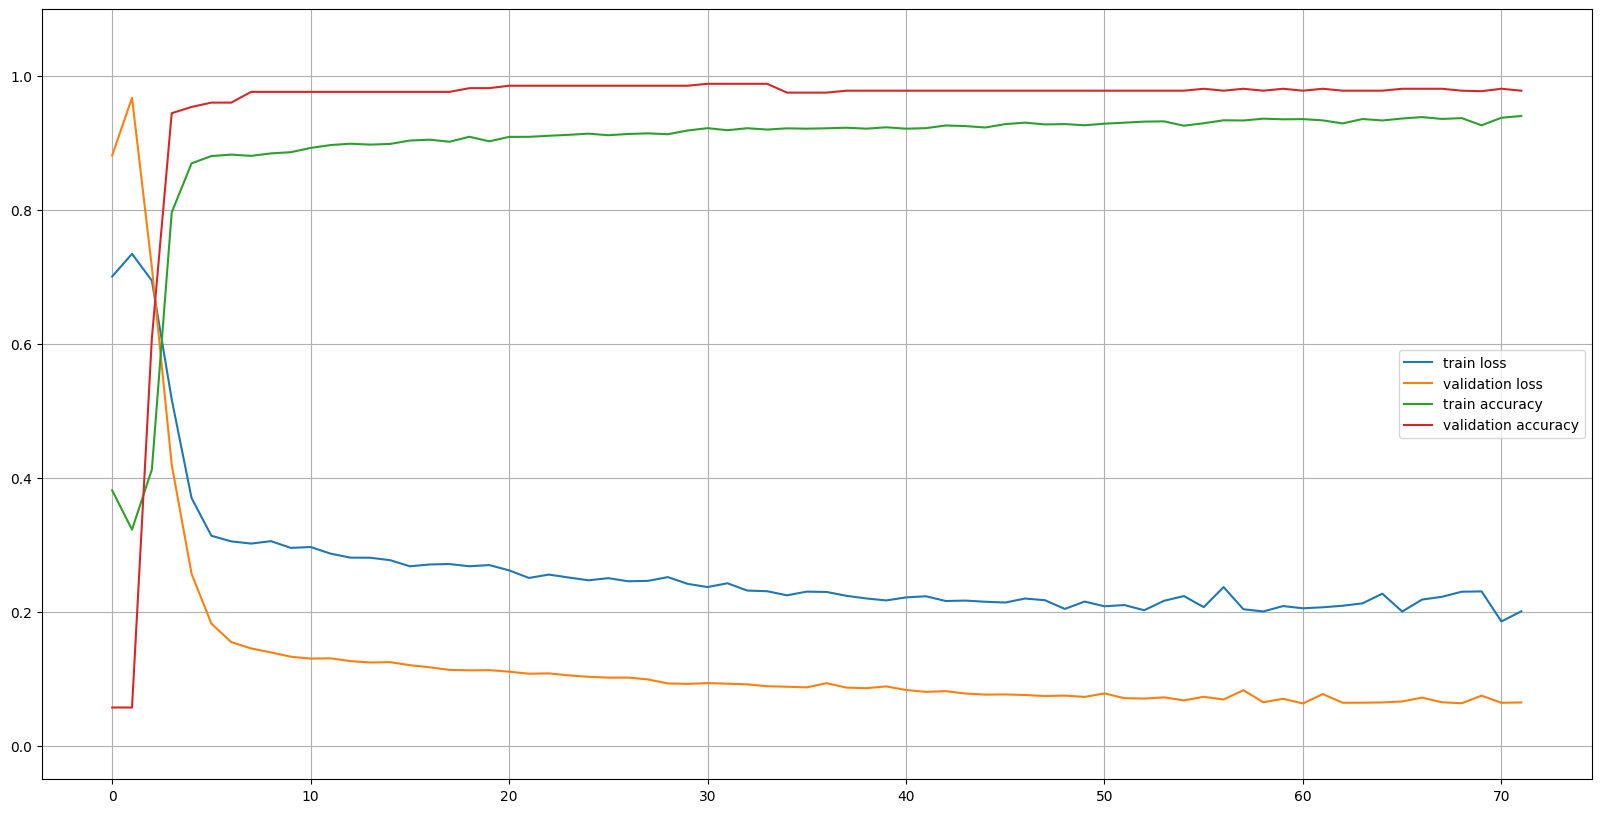

TA=0.9406219972359026, VA=0.9784129864892115


In [110]:
# PLOTS
plt.figure(figsize=(20,10))
plt.ylim([-.05, 1.1])
plt.grid()
plt.plot(rnn.train_losses)
plt.plot(rnn.validation_losses)
plt.plot(rnn.train_accuracies)
plt.plot(rnn.validation_accuracies)
plt.legend(['train loss', 'validation loss', 'train accuracy', 'validation accuracy'])
plt.show()

print(f'TA={rnn.train_accuracies[-1]}, VA={rnn.validation_accuracies[-1]}')